# Referencing Functions
*This is a supplemental tutorial dealing with functions. It focuses more on functions than it does on fitting.*

Up to this point, our functions have all been one, singular function. For example:

This function is entirely self-contained. 
There is one definition which uses only one line and doesn't depend on anything else.

What if we have a very complex function? Writing it all in one line might lead to mistakes if our function becomes difficult to read:

Let's try to redefine this function in a way that's easier to read.

In [36]:
#Imports
import numpy as np
from scipy.integrate import quad

def f(n,a):
    i = lambda x: np.power(np.sqrt(a*x**2),(np.exp(x)+np.power(np.sqrt(np.exp(np.exp(a*x))),a*x**2))) #This is the integrand from the above function.
    #I isn't defined outside of this indented region because it's not the definition that we're returning. It's just an intermediate step.
    return quad(i,0,n)[0] #Integrate i from 0 to n with respect to x. 
    #The [0] indicates that we want the 0th element, which is the integral result. The 1st element is uncertainty.
    
print(f(1,1)) #Test that syntax is valid by printing a value

0.2194897612484102


It's possible to clean things up more, but since that's not our end goal, let's move on. 
If we did clean it up more, we could use pretty much as many intermediate steps as we wanted.

Let's try with a function that's a bit more familiar to us, so that we can be sure we're plugging things in correctly.</br>

In [49]:
def f(x,a,b,c):
    q = a*x**2   #Quadratic term
    l = b*x      #Linear term
    k = c        #Constant term
    return q+l+k #Total is a*x**2 + b*x + c -- our original function from the first tutorial!

y = lambda x: f(x,1,0,0) #Our true function y = f(x) = x^2

Now let's plot to check that the function looks how we wanted it to.

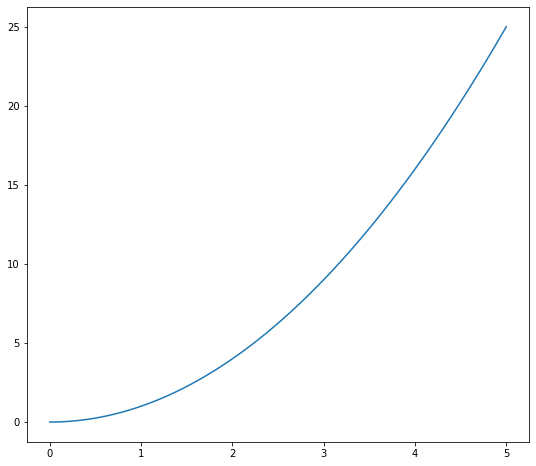

In [50]:
#Imports
import matplotlib.pyplot as plt

#Set up x-values to plot the curve
xdata = np.linspace(0,5,100)

#Plotting
fig = plt.figure(figsize=(9.0,8.0))
plt.plot(xdata,y(xdata)) #We skipped the legend definition since we only have one thing to plot.
plt.show(fig)

That looks about right! So the big question now is: can we do a curve fit with the definitions set up like this?

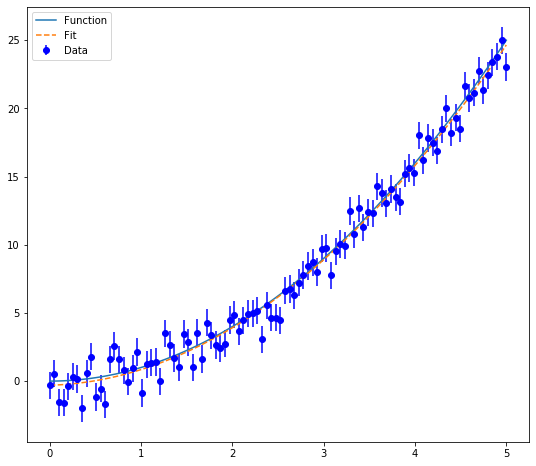

In [58]:
#Import
import lmfit as lf

#Generate fakedata
ydata = np.zeros(len(xdata))
noise = np.random.normal(0,1,len(xdata))
for i,n in enumerate(xdata):
    ydata[i] = n**2+noise[i]
sigdata = np.ones(len(xdata))
weighdata = 1/sigdata

#Fit
l_mod = lf.Model(f)
params = l_mod.make_params(a=1, b=0, c=0)
l_fit = l_mod.fit(ydata, params, x=xdata, weights=weighdata)
l_dict = l_fit.best_values
l_a = l_dict['a']
l_b = l_dict['b']
l_c = l_dict['c']
l_curve = l_a*xdata**2+l_b*xdata+l_c

#Plot
fig = plt.figure(figsize=(9.0,8.0))
plt.errorbar(xdata,ydata,yerr=sigdata,fmt='bo',label='Data')
plt.plot(xdata,y(xdata),label='Function')
plt.plot(xdata,l_curve,linestyle='--',label='Fit')
plt.legend()
plt.show()

#More info
l_fit

----
As a quick comparison, let's look at the fit done how we did it before, with everything done in one line:

In [60]:
#Redefine function
def f(x,a,b,c):
    return a*x**2 + b*x + c

#Fit
l_mod = lf.Model(f)
params = l_mod.make_params(a=1, b=0, c=0)
l_fit = l_mod.fit(ydata, params, x=xdata, weights=weighdata)
l_fit

You should see identical outputs from these two functions, which is exactly what we want. 
It seems that splitting up our function should, as we expected, have no effect on our curve fit, and can help make our code more readable.